# 회귀분석

- 변수 x가 변수 y에 주는 영향을 알기 위한 분석 방법

- 특정 변수를 예측하거나 추론하기 위한 분석 방법

- 독립변수의 개수가 하나이면 단순선형회귀분석, 독립변수의 개수가 두 개 이상이면 다중선형회귀분석

## 선형회귀분석
- 종속변수와 독립변수와의 선형 상관 관계를 모델링하는 회귀분석 기법

In [2]:
# install.packages("UsingR")
library(UsingR)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘HistData’, ‘Hmisc’


Loading required package: MASS

Loading required package: HistData

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘UsingR’


The following object is masked from ‘package:survival’:

    cancer




In [3]:
# galton : 928개의 부모의 키와 아이의 키에 대한 데이터
str(galton)

'data.frame':	928 obs. of  2 variables:
 $ child : num  61.7 61.7 61.7 61.7 61.7 62.2 62.2 62.2 62.2 62.2 ...
 $ parent: num  70.5 68.5 65.5 64.5 64 67.5 67.5 67.5 66.5 66.5 ...


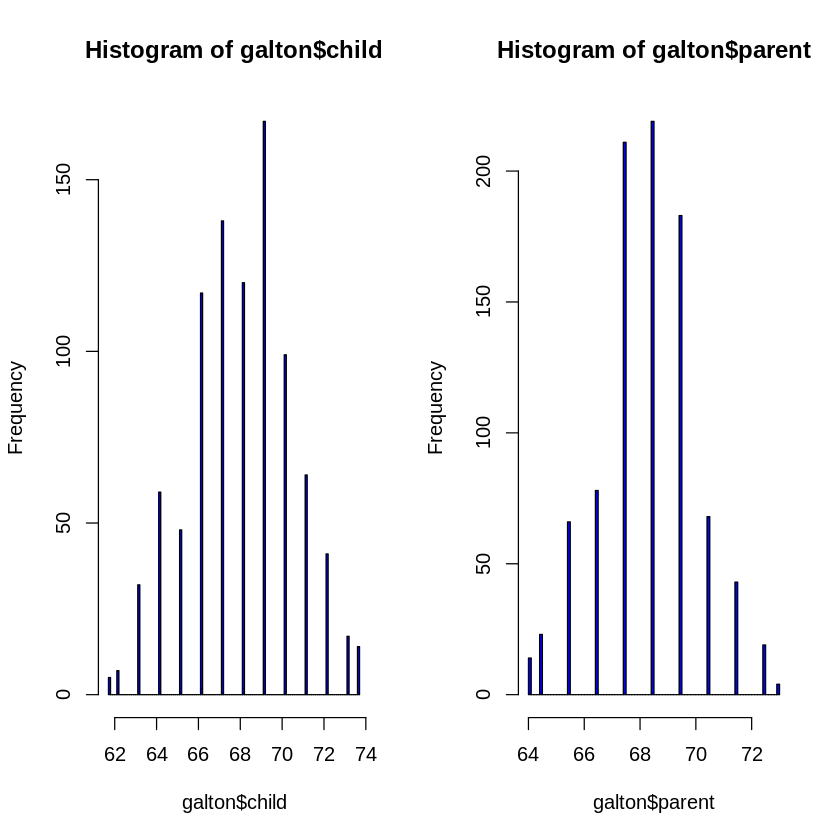

In [4]:
# 데이터의 분포를 확인
# par() : 그래프의 모양을 다양하게 조절하는 함수
# mfrow : 한 화면에 여러 그래프를 비교하기 위해
par(mfrow = c(1, 2))
hist(galton$child, col = "blue", breaks = 100)
hist(galton$parent, col = "blue", breaks = 100)
par(mfrow = c(1, 1))

In [5]:
# lm(종속변수 ~ 독립변수, 데이터)
lm_gal <- lm(child~parent, data = galton)
summary(lm_gal)
# 회귀식 : 23.94153 + 0.64629*parent


Call:
lm(formula = child ~ parent, data = galton)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8050 -1.3661  0.0487  1.6339  5.9264 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.94153    2.81088   8.517   <2e-16 ***
parent       0.64629    0.04114  15.711   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.239 on 926 degrees of freedom
Multiple R-squared:  0.2105,	Adjusted R-squared:  0.2096 
F-statistic: 246.8 on 1 and 926 DF,  p-value: < 2.2e-16


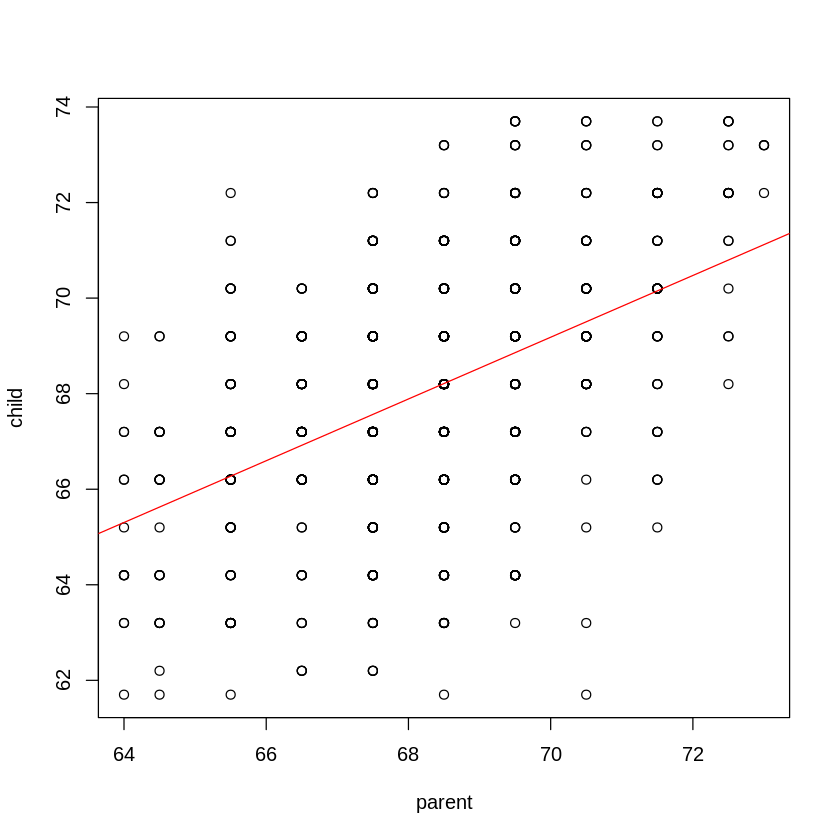

In [6]:
# 그래프로 그려보기
plot(child~parent, data = galton)
abline(lm_gal, col = "red")

### 단순선형회귀 연습
- women 데이터 : 30 ~ 39세의 미국 여성 15명의 키와 몸무게 데이터, 단위는 인치, 파운드로 되어있음

- 분석목표 : women데이터에서 키로 몸무게를 예측하는 회귀모델 훈련

In [7]:
women

height,weight
<dbl>,<dbl>
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139


In [8]:
lm_women <- lm(weight ~ height, data = women)
summary(lm_women)


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


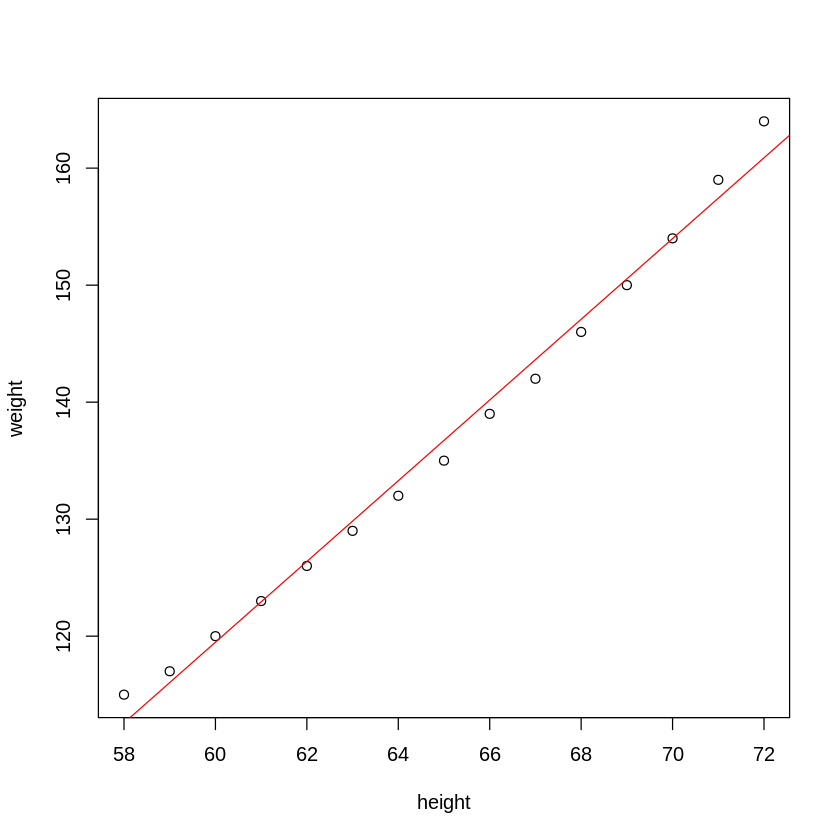

In [10]:
plot(weight ~ height, data = women)
abline(lm_women, col = "red")

## 다중선형회귀

In [11]:
library(MASS)

In [12]:
head(Cars93)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,⋯,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,⋯,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,⋯,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,⋯,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,⋯,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,⋯,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,⋯,6,189,105,69,41,28.0,16,2880,USA,Buick Century


In [13]:
lm(Price ~ EngineSize + RPM + Weight, data = Cars93)
# 회귀식 : -51.793292 + 4.305 * EngineSize + 0.007 * RPM + 0.007 * Weight


Call:
lm(formula = Price ~ EngineSize + RPM + Weight, data = Cars93)

Coefficients:
(Intercept)   EngineSize          RPM       Weight  
 -51.793292     4.305387     0.007096     0.007271  


In [14]:
summary(lm(Price ~ EngineSize + RPM + Weight, data = Cars93))


Call:
lm(formula = Price ~ EngineSize + RPM + Weight, data = Cars93)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.511  -3.806  -0.300   1.447  35.255 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -51.793292   9.106309  -5.688 1.62e-07 ***
EngineSize    4.305387   1.324961   3.249  0.00163 ** 
RPM           0.007096   0.001363   5.208 1.22e-06 ***
Weight        0.007271   0.002157   3.372  0.00111 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.504 on 89 degrees of freedom
Multiple R-squared:  0.5614,	Adjusted R-squared:  0.5467 
F-statistic: 37.98 on 3 and 89 DF,  p-value: 6.746e-16


In [ ]:
# P-value : 각 변수가 종속변수에 미치는 영향이 유의한지 파악, 0.05미만에서
# 유의미하다

# Adjusted R-squared(수정결정계수) : 회귀선이 종속변수의 몇 %를 설명할 수
# 있는지 확인

# 현재 p-value 0.05미만이기 때문에 추정된 회귀 모형이 통계적으로 매우 유의하다.
# 수정결정계수는 0.5467로 다소 낮아, 이 회귀식이 데이터를 적절하게 설명하고
# 있지는 않다
# 결정계수가 낮아 데이터의 설명력은 낮지만 회귀식과 회귀계수들이 유의미하여
# 엔진크기와 RPM 그리고 무게로 자동차의 가격을 추정할 수 있다.